# Competição DSA de Machine Learning

# Competição
Edição de Janeiro/2019 da Competição DSA de Machine Learning. Esta é uma excelente oportunidade para você praticar tudo que aprendeu nos cursos da Data Science Academy, desenvolver suas habilidades de solução de problemas e ainda ganhar prêmios.
#  Detalhes
O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.
## Aluno
#### Nome: Fernando de Almeida Noronha
#### e-mail: fer.noronha@hotmail.com
#### Aluno iniciante da Formação de Cientista de dados.

## Aplicação de uma simples Random Forest Classifier para prever ocorrência de diabetes 

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#lendo e armazenando os datasets de treino e teste
dt = pd.read_csv('dataset_treino.csv')
dt_teste = pd.read_csv('dataset_teste.csv')
#criando um campo para as features
features = ['num_gestacoes','glicose','pressao_sanguinea','grossura_pele','insulina','bmi','indice_historico','idade']

In [3]:
#verificando valores nulos do dataset de treino
dt.isnull().sum()

id                   0
num_gestacoes        0
glicose              0
pressao_sanguinea    0
grossura_pele        0
insulina             0
bmi                  0
indice_historico     0
idade                0
classe               0
dtype: int64

In [4]:
#verificando valores nulos do dataset de teste
dt_teste.isnull().sum()

id                   0
num_gestacoes        0
glicose              0
pressao_sanguinea    0
grossura_pele        0
insulina             0
bmi                  0
indice_historico     0
idade                0
dtype: int64

In [5]:
#verificando os tipos de dados do dataset de treino
dt.dtypes

id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

In [6]:
#verificando os tipos de dados do dataset de teste
dt_teste.dtypes

id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
dtype: object

In [7]:
#dividindo o dataset de treino em datasets contendo as features e o outro a classe
X = dt[features]
y = dt.classe

In [8]:
#descrição dos campos
dt.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


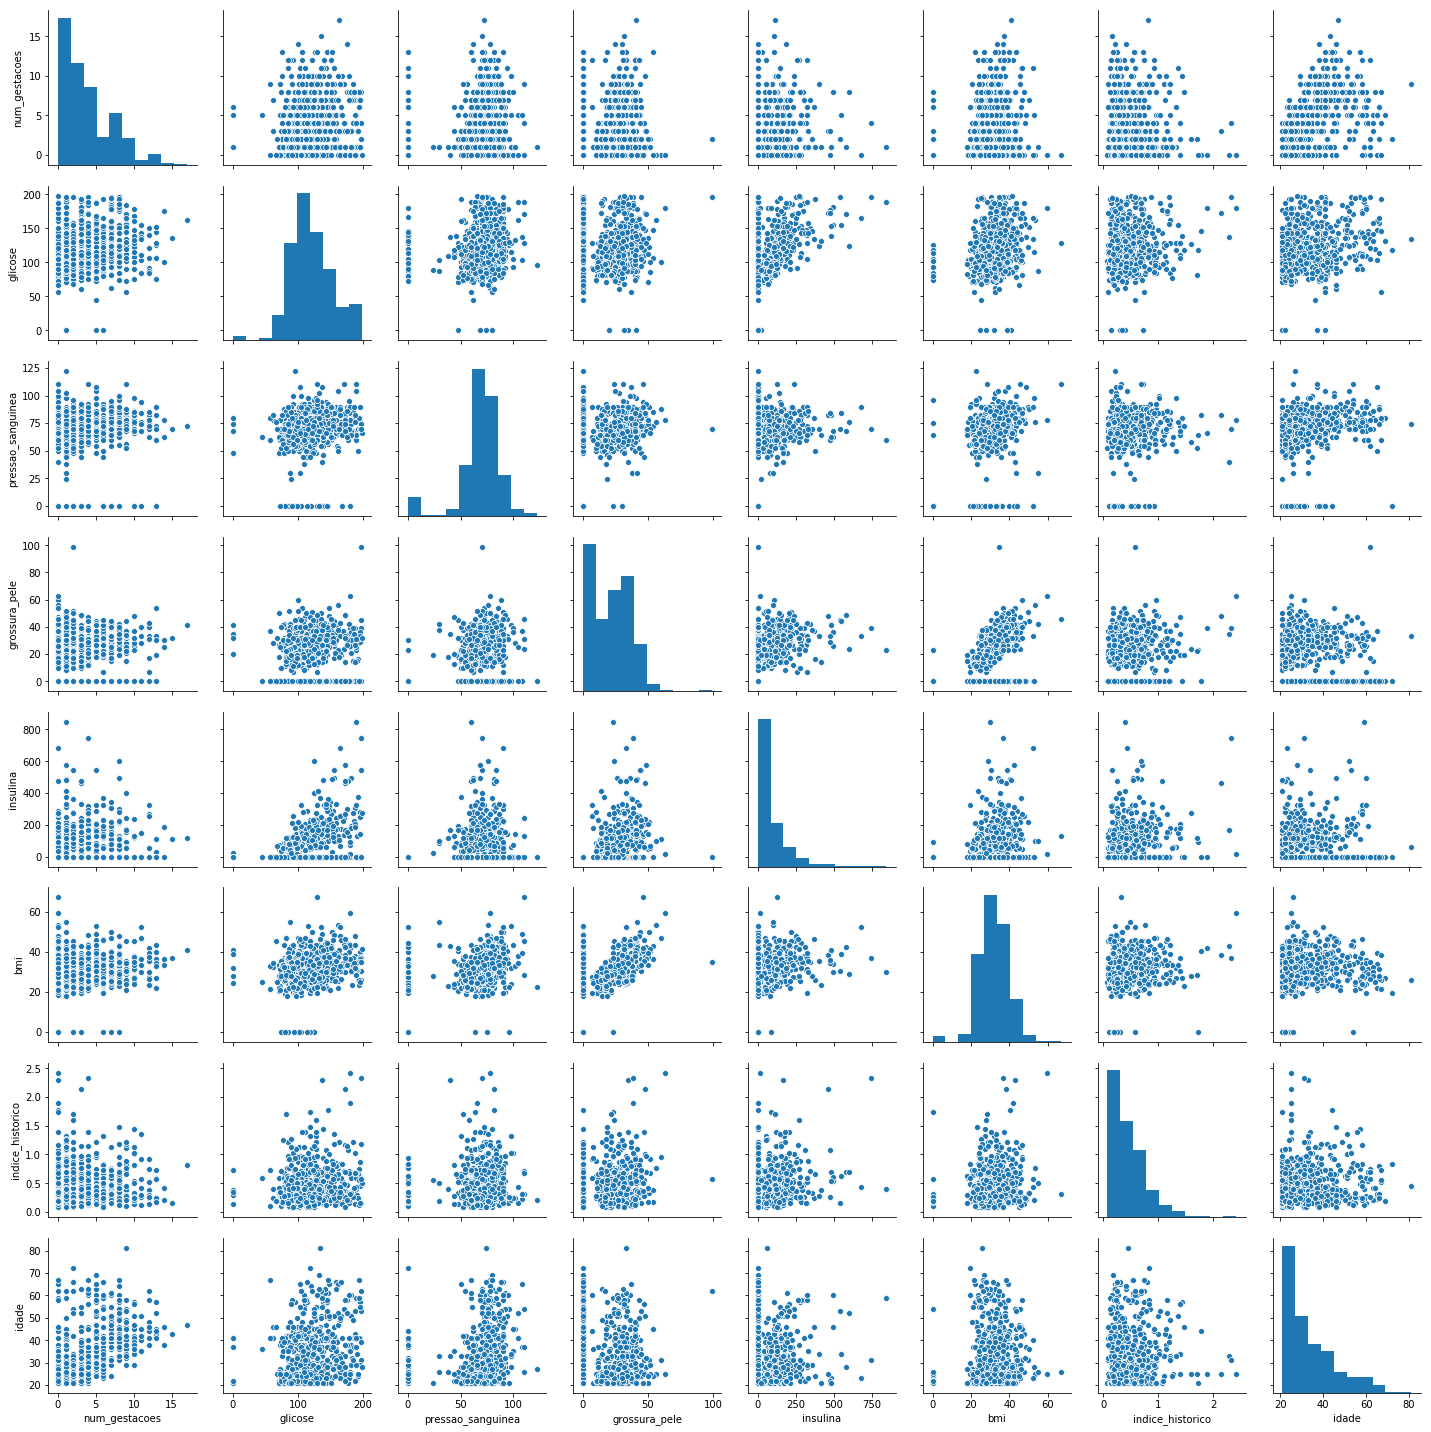

In [9]:
#analisando os dados graficamente
sn.pairplot(data = X)

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
273,1,71,78,50,45,33.2,0.422,21
38,2,90,68,42,0,38.2,0.503,27
213,0,140,65,26,130,42.6,0.431,24
8,2,197,70,45,543,30.5,0.158,53
485,0,135,68,42,250,42.3,0.365,24


,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
549,4,189,110,31,0,28.5,0.680,37
124,0,113,76,0,0,33.3,0.278,23
422,0,102,64,46,78,40.6,0.496,21
579,2,197,70,99,0,34.7,0.575,62
74,1,79,75,30,0,32.0,0.396,22


In [10]:
#criando a rede random forest classifier
rf = RandomForestClassifier(n_estimators=100)

In [11]:
#treinando a rede
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
#score do treino
rf.score(X,y)

1.0

In [13]:
#matriz de confusão do teste
cnf_matrix = confusion_matrix(y, y)
cnf_matrix

array([[392,   0],
       [  0, 208]], dtype=int64)

In [14]:
teste = dt_teste[features]
result = rf.predict(teste)
df_result = dt_teste.id
dataframe=pd.DataFrame(result, columns=['classe'])
final = pd.concat([df_result, dataframe], axis=1,ignore_index=False)
final.to_csv('final_random_forest.csv',index=False)

In [15]:
final.head(5)

,id,classe
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


In [16]:
final.dtypes

id        int64
classe    int64
dtype: object